## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
## use this part, if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data and check the first few lines
dataset_path = "/content/drive/MyDrive/Fraud_Detection/fake_job_postings.csv"
dataset = pd.read_csv(dataset_path)
dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
dataset.shape

(17880, 18)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
dataset.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
dataset.isna().sum() / dataset.shape[0]

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [8]:
dataset.duplicated().sum()

0

#### new feature1: missing_value_rate

In [9]:
# new feature: calculate missing value rate
dataset['missing_value_rate'] = (dataset.isnull().sum(axis=1) / (len(dataset.columns)-1)).round(2)

In [10]:
dataset.groupby('fraudulent')['missing_value_rate'].mean()

fraudulent
0    0.229606
1    0.274584
Name: missing_value_rate, dtype: float64

## 2. EDA

- wordcut: title,department,salary_range,industry,function,company_profile,description,requirements,benefits,location

### 2.1 Distribution of variables

<Axes: >

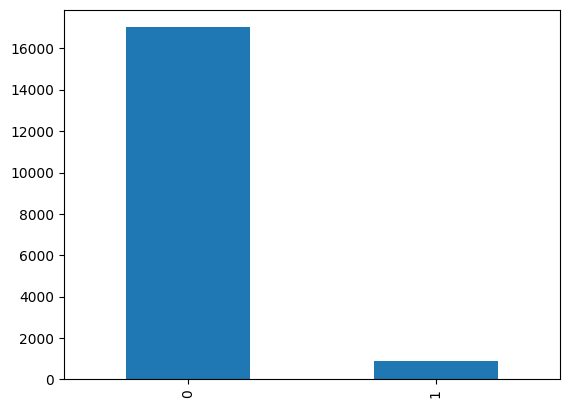

In [ ]:
#fraudulent
dataset.fraudulent.value_counts().plot(kind="bar")

In [ ]:
dataset.fraudulent.value_counts(1)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

In [ ]:
dataset.title.str.strip().value_counts()

English Teacher Abroad                                         406
Customer Service Associate                                     198
Graduates: English Teacher Abroad (Conversational)             144
Customer Service Associate - Part Time                          91
Software Engineer                                               90
                                                              ... 
Sales Executive - Office Equipment                               1
QA/QC Leader - Cured Meats Co - Chicagoland                      1
Application Developer/SQL Server                                 1
Training Assistant                                               1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10915, dtype: int64

In [ ]:
dataset['title'] = dataset['title'].str.strip()

In [ ]:
#location
dataset.location.value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

#### new feature2: location_country/_state

In [11]:
# transform to lowercase
dataset['location'] = dataset['location'].str.lower()
# strip whitespace in the end
dataset['location'] = dataset['location'].str.strip(', ')

In [12]:
# clean the format of locations
dataset['location'] = dataset['location'].str.replace('tel-aviv', 'tel aviv')
dataset['location'] = dataset['location'].str.replace('california','ca')
dataset['location'] = dataset['location'].str.replace('uk','gb')
dataset['location'] = dataset['location'].str.replace('israel','il')
dataset['location'] = dataset['location'].str.replace('greece','gr')
dataset['location'] = dataset['location'].str.replace('washington, dc','dc')
dataset['location'] = dataset['location'].str.replace('washington','dc')
dataset['location'] = dataset['location'].str.replace('washington, d.c.','dc')
dataset['location'] = dataset['location'].str.replace('d.c.','dc')
dataset['location'] = dataset['location'].str.replace('london','lnd')
dataset['location'] = dataset['location'].str.replace('lon','lnd')
dataset['location'] = dataset['location'].str.replace('liverpool','liv')
dataset['location'] = dataset['location'].str.replace('aberdeen','abe')
dataset['location'] = dataset['location'].str.replace('wakefield','wkf')
dataset['location'] = dataset['location'].str.replace('san francisco','sfo')
dataset['location'] = dataset['location'].str.replace('hertzelia','herzliya')
dataset['location'] = dataset['location'].str.replace('tel aviv','ta')
dataset['location'] = dataset['location'].str.replace('tel','ta')
# remove extra words
dataset['location'] = dataset['location'].str.replace(r'(?<=us,)(.*?)(us)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=ca,)(.*?)(ca)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=ga,)(.*?)(ga)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=gb,)(.*?)(gb)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=gr,)(.*?)(gr)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=nc,)(.*?)(nc)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=ny,)(.*?)(ny)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=co,)(.*?)(co)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=dc,)(.*?)(dc)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=fl,)(.*?)(fl)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=il,)(.*?)(il)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=nj,)(.*?)(nj)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=wkf,)(.*?)(wkf)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=lnd,)(.*?)(lnd)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=liv,)(.*?)(liv)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=abe,)(.*?)(abe)', r'\1').str.strip(', ')
dataset['location'] = dataset['location'].str.replace(r'(?<=sfo,)(.*?)(sfo)', r'\1').str.strip(', ')

In [13]:
# clean the state/county info of locations
dataset.loc[dataset['location'] == 'us, , stocton, ca', 'location'] = 'us, ca, stocton'
dataset.loc[dataset['location'] == 'us, , irvine, ca', 'location'] = 'us, ca, irvine'
dataset.loc[dataset['location'] == 'ca, , rio rancho, nm', 'location'] = 'us, nm, rio rancho'
dataset.loc[dataset['location'] == 'gb, , grange moore, wkf', 'location'] = 'gb, wkf, grange moore'
dataset.loc[dataset['location'] == 'us, , portsmouth, nh', 'location'] = 'us, nh, portsmouth'
dataset.loc[dataset['location'] == 'us, , brooklyn, ny', 'location'] = 'us, ny, brooklyn'
dataset.loc[dataset['location'] == 'gb, , see the requirements section for areas and locations available', 'location'] = 'gb'
dataset.loc[dataset['location'] == 'il, , ta', 'location'] = 'il, ta, ta'
dataset.loc[dataset['location'] == 'il, m, ta', 'location'] = 'il, ta, ta'
dataset.loc[dataset['location'] == 'il, , herzliya', 'location'] = 'il, ta, herzliya'
dataset.loc[dataset['location'] == 'il, m, herzliya', 'location'] = 'il, ta, herzliya'

In [14]:
# extract country and state
dataset['location_country'] = dataset['location'].str.split(',').str[0]
dataset['location_state'] = dataset['location'].str.split(',').str[1].str.strip()
dataset['location_state'] = dataset['location_state'].str.replace(r'[^0-9a-zA-Z]+', ' ', regex=True).str.strip()
dataset['location_state'] = dataset['location_state'].str.replace(r'\s+', ' ', regex=True)

In [15]:
dataset['location_country'].value_counts()

us    10657
gb     2384
gr      940
ca      456
de      383
      ...  
si        1
pe        1
sd        1
ug        1
kh        1
Name: location_country, Length: 90, dtype: int64

In [16]:
dataset['location_state'].value_counts()

ca     2054
ny     1260
       1166
lnd     992
tx      975
       ... 
enf       1
d         1
061       1
82        1
nle       1
Name: location_state, Length: 322, dtype: int64

In [ ]:
# location may contain multiple cities
# dataset['location_len'] = dataset['location'].fillna('').str.split(',').apply(len)

In [17]:
dataset.isna().sum() / dataset.shape[0]

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
missing_value_rate     0.000000
location_country       0.019351
location_state         0.077405
dtype: float64

In [ ]:
#len(dataset[dataset['location_state']==''])
#1166

In [ ]:
#department
dataset.department.value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

In [18]:
#salary_range, 0-0 is the most common one
dataset.salary_range.value_counts()

0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

In [ ]:
#company_profile
dataset.company_profile.head(10)

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
5                                                  NaN
6    Founded in 2009, the Fonpit AG rose with its i...
7    Airenvy’s mission is to provide lucrative yet ...
8    Solutions3 is a woman-owned small business who...
9    Novitex Enterprise Solutions, formerly Pitney ...
Name: company_profile, dtype: object

In [ ]:
#description
dataset.description.head(10)

0    Food52, a fast-growing, James Beard Award-winn...
1    Organised - Focused - Vibrant - Awesome!Do you...
2    Our client, located in Houston, is actively se...
3    THE COMPANY: ESRI – Environmental Systems Rese...
4    JOB TITLE: Itemization Review ManagerLOCATION:...
5    Job OverviewApex is an environmental consultin...
6    Your Responsibilities: Manage the English-spea...
7    Who is Airenvy?Hey there! We are seasoned entr...
8    Implementation/Configuration/Testing/Training ...
9    The Customer Service Associate will be based i...
Name: description, dtype: object

In [ ]:
#requirements
dataset.requirements.head(10)

0    Experience with content management systems a m...
1    What we expect from you:Your key responsibilit...
2    Implement pre-commissioning and commissioning ...
3    EDUCATION: Bachelor’s or Master’s in GIS, busi...
4    QUALIFICATIONS:RN license in the State of Texa...
5                                                  NaN
6    Your Know-How:                                ...
7    Experience with CRM software, live chat, and p...
8    MUST BE A US CITIZEN.An active TS/SCI clearanc...
9    Minimum Requirements:Minimum of 6 months custo...
Name: requirements, dtype: object

In [ ]:
#benefits
dataset.benefits.head(10)

0                                                  NaN
1    What you will get from usThrough being part of...
2                                                  NaN
3    Our culture is anything but corporate—we have ...
4                                Full Benefits Offered
5                                                  NaN
6    Your Benefits: Being part of a fast-growing co...
7    Competitive Pay. You'll be able to eat steak e...
8                                                  NaN
9                                                  NaN
Name: benefits, dtype: object

In [ ]:
#telecommuting, 0 for remote working
dataset.telecommuting.value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

In [ ]:
#has_company_logo
dataset.has_company_logo.value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

In [ ]:
#has_questions
dataset.has_questions.value_counts()

0    9088
1    8792
Name: has_questions, dtype: int64

In [ ]:
#employment_type
dataset.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [ ]:
#required_experience
dataset.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [ ]:
#required_education
dataset.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
#industry
dataset.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [ ]:
#function
dataset.function.value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

### 2.2 Relationship between features and classification target

In [ ]:
dataset[dataset['fraudulent']==1]['title'].value_counts()

Data Entry Admin/Clerical Positions - Work From Home               21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
RN, SURGERY UNIT DIRECTOR                                           1
Registered Nurse                                                    1
Licensed Practical Nurse                                            1
Professional Development Coordinator (Perioperative)                1
Furniture mover                                                     1
Name: title, Length: 560, dtype: int64

In [ ]:
len(dataset[dataset['title'].str.contains('URGENT', case=False, na=False)])

55

In [ ]:
len(dataset[dataset['title'].str.contains('URGENT', case=False, na=False) & (dataset['fraudulent'] == 1)])

37

In [ ]:
dataset['title'].str

#### new feature3: title_contain_urgent

In [19]:
dataset['title_contain_urgent'] = dataset['title'].apply(lambda x: 1 if 'urgent' in x.lower() else 0)

In [ ]:
dataset[dataset['fraudulent']==0]['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
Developer Evangelist                                             1
Siebel Integration Developer                                     1
Front-end designer                                               1
Teradata DBA                                                     1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 10730, dtype: int64

In [ ]:
#department
dataset[dataset['fraudulent']==1]['department'].value_counts()

Engineering                                    46
Clerical                                       27
Oil & Energy                                   24
Information Technology                         15
Administrative                                 14
                                               ..
Administration                                  1
Commercial Management / Contract Management     1
Engineering - Construction                      1
Recruiting                                      1
Sales and Marketing                             1
Name: department, Length: 103, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['department'].value_counts()

Sales                    539
Engineering              441
Marketing                399
Operations               270
IT                       224
                        ... 
OTC                        1
Administrator              1
Disruptive Innovation      1
Greetsnap Development      1
Styling                    1
Name: department, Length: 1269, dtype: int64

In [ ]:
#salary_range
dataset[dataset['fraudulent']==1]['salary_range'].value_counts()

7200-1380000       10
30000-50000         8
250000-500000       7
28000-32000         6
35000-40000         6
                   ..
0-2000              1
34000-50000         1
2000-2000           1
6266624-8582080     1
0-30000             1
Name: salary_range, Length: 117, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['salary_range'].value_counts()

0-0              138
40000-50000       65
30000-40000       51
45000-67000       37
25000-30000       32
                ... 
60-75              1
300000-325000      1
27500-36000        1
20-22              1
15500-16500        1
Name: salary_range, Length: 828, dtype: int64

In [ ]:
#location
dataset[dataset['fraudulent']==1]['location_country'].value_counts()

US    730
AU     40
GB     23
MY     12
CA     12
QA      6
BH      5
IN      4
PL      3
TW      2
PK      1
EG      1
ID      1
ZA      1
EE      1
AE      1
PH      1
SA      1
BR      1
ES      1
Name: location_country, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['location_country'].value_counts()

US    9926
GB    2361
GR     940
CA     445
DE     383
      ... 
AL       1
GH       1
UG       1
PE       1
MA       1
Name: location_country, Length: 90, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==1]['location_state'].value_counts()

tx     152
ca     143
ny      68
        57
md      35
      ... 
vic      1
ans      1
wc       1
arm      1
lin      1
Name: location_state, Length: 76, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['location_state'].value_counts()

       2083
ca     1908
ny     1191
lnd     986
tx      823
       ... 
trf       1
enf       1
d         1
061       1
nle       1
Name: location_state, Length: 322, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==1]['location_city'].value_counts()

               129
houston         94
sydney          31
bakersfield     30
los angeles     30
              ... 
ridgewood        1
gaffney          1
shawnee          1
plano            1
immingham        1
Name: location_city, Length: 244, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['location_city'].value_counts()

                    1505
london              1102
new york             681
athens               560
san francisco        483
                    ... 
westport               1
dhule                  1
hunt valley            1
germany                1
berkeley heights       1
Name: location_city, Length: 1913, dtype: int64

In [ ]:
#company_profile
# if company_profile is null, more likely to be fraudulent
dataset[dataset['company_profile'].isna()]['fraudulent'].mean()

0.17744860943168078

In [ ]:
dataset[~dataset['company_profile'].isna()]['fraudulent'].mean()

0.01914630798792204

#### new feature4: company_profile_isna

In [20]:
dataset['company_profile_isna'] = dataset['company_profile'].isna().replace({True: 1, False: 0})

In [ ]:
#description

In [ ]:
#requirements

In [ ]:
#benefits

<Axes: xlabel='telecommuting'>

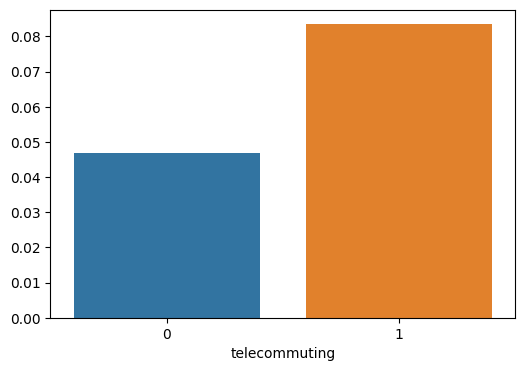

In [ ]:
#telecommuting
telecommuting_fraud = dataset.groupby('telecommuting')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=telecommuting_fraud.index, y=telecommuting_fraud.values, ax=ax)

<Axes: xlabel='telecommuting', ylabel='count'>

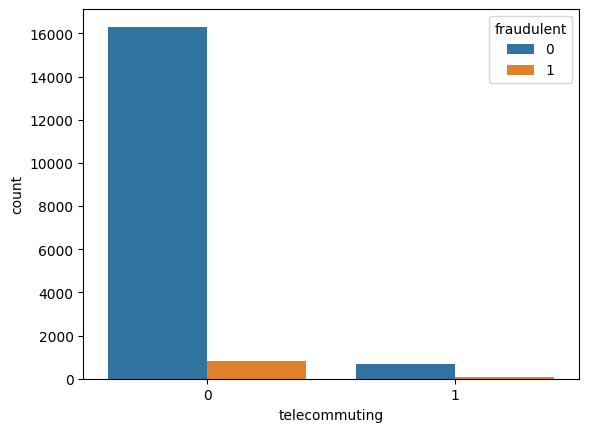

In [ ]:
sns.countplot(x='telecommuting',data=dataset,hue='fraudulent')

<Axes: xlabel='has_company_logo'>

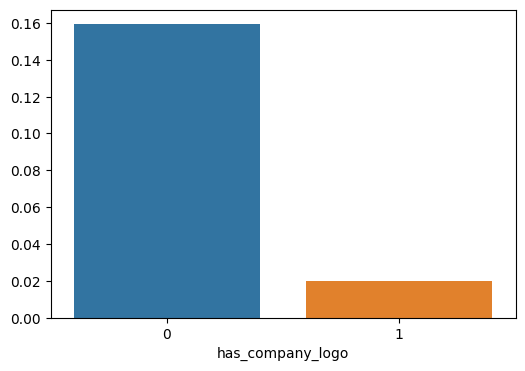

In [ ]:
#has_company_logo
has_company_logo_fraud = dataset.groupby('has_company_logo')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=has_company_logo_fraud.index, y=has_company_logo_fraud.values, ax=ax)

<Axes: xlabel='has_company_logo', ylabel='count'>

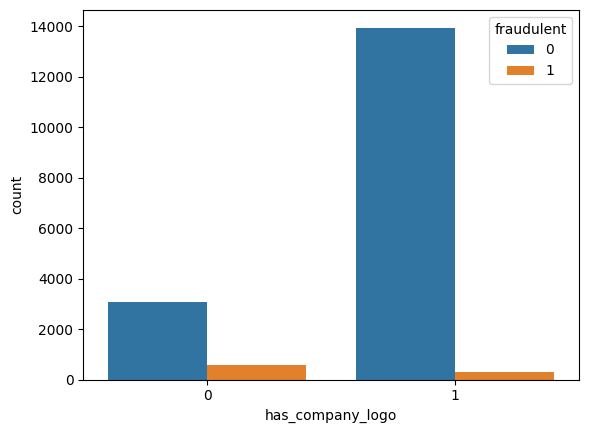

In [ ]:
sns.countplot(x='has_company_logo',data=dataset,hue='fraudulent')

<Axes: xlabel='has_questions'>

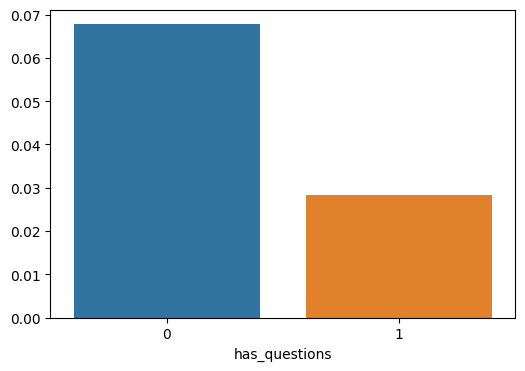

In [ ]:
#has_questions
has_questions_fraud = dataset.groupby('has_questions')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=has_questions_fraud.index, y=has_questions_fraud.values, ax=ax)

<Axes: xlabel='has_questions', ylabel='count'>

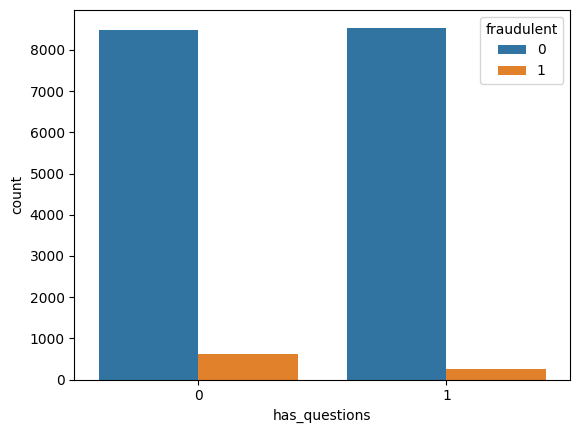

In [ ]:
sns.countplot(x='has_questions',data=dataset,hue='fraudulent')

<Axes: xlabel='employment_type'>

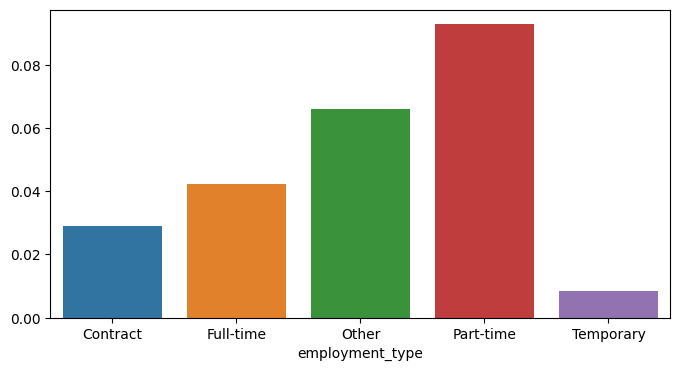

In [ ]:
#employment_type
employment_type_fraud = dataset.groupby('employment_type')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.barplot(x=employment_type_fraud.index, y=employment_type_fraud.values, ax=ax)

<Axes: xlabel='employment_type', ylabel='count'>

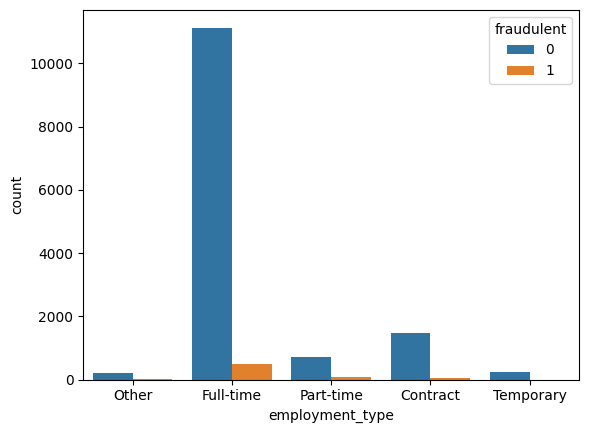

In [ ]:
sns.countplot(x='employment_type',data=dataset,hue='fraudulent')

<Axes: xlabel='required_experience'>

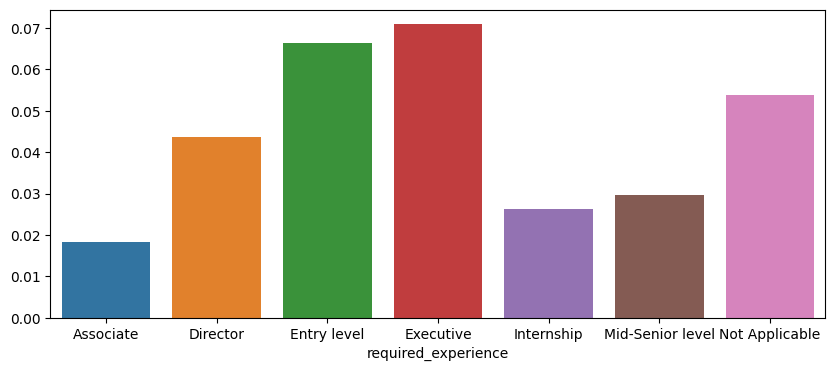

In [ ]:
#required_experience
required_experience_fraud = dataset.groupby('required_experience')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(x=required_experience_fraud.index, y=required_experience_fraud.values, ax=ax)

<Axes: xlabel='required_experience', ylabel='count'>

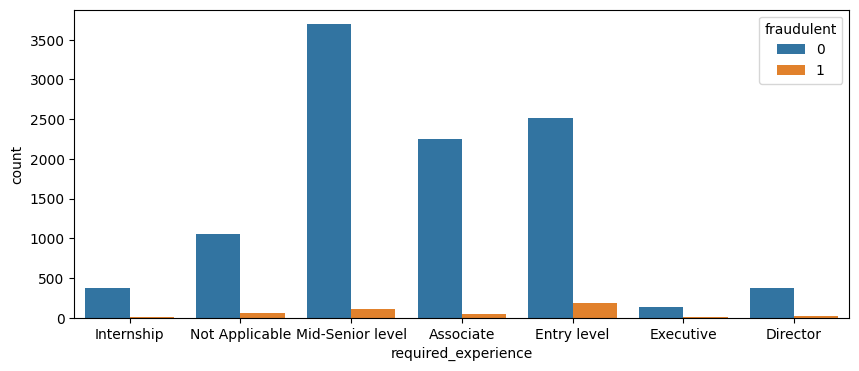

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.countplot(x='required_experience',data=dataset,hue='fraudulent',ax=ax)

In [ ]:
#required_education
dataset[dataset['fraudulent']==1]['required_education'].value_counts()

High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: required_education, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['required_education'].value_counts()

Bachelor's Degree                    5045
High School or equivalent            1910
Unspecified                          1336
Master's Degree                       385
Associate Degree                      268
Certification                         151
Some College Coursework Completed      99
Professional                           70
Vocational                             49
Doctorate                              25
Vocational - HS Diploma                 9
Some High School Coursework             7
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
#industry
dataset[dataset['fraudulent']==1]['industry'].value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['industry'].value_counts()

Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
Marketing and Advertising               783
                                       ... 
Museums and Institutions                  1
Sporting Goods                            1
Shipbuilding                              1
Alternative Dispute Resolution            1
Military                                  1
Name: industry, Length: 130, dtype: int64

In [ ]:
#department
dataset[dataset['fraudulent']==1]['department'].value_counts()

Engineering                                    46
Clerical                                       27
Oil & Energy                                   24
Information Technology                         15
Administrative                                 14
                                               ..
Administration                                  1
Commercial Management / Contract Management     1
Engineering - Construction                      1
Recruiting                                      1
Sales and Marketing                             1
Name: department, Length: 103, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['department'].value_counts()

Sales                    539
Engineering              441
Marketing                399
Operations               270
IT                       224
                        ... 
OTC                        1
Administrator              1
Disruptive Innovation      1
Greetsnap Development      1
Styling                    1
Name: department, Length: 1269, dtype: int64

In [ ]:
#function
dataset[dataset['fraudulent']==1]['function'].value_counts()

Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Financial Analyst           5
Advertising                 5
Consulting                  4
Data Analyst                4
Distribution                3
Design                      3
Manufacturing               2
Public Relations            1
Education                   1
Business Analyst            1
Strategy/Planning           1
General Business            1
Art/Creative                1
Health Care Provider        1
Name: function, dtype: int64

In [ ]:
dataset[dataset['fraudulent']==0]['function'].value_counts()

Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Health Care Provider       337
Design                     337
Education                  324
Management                 311
Other                      293
Business Development       215
Human Resources            196
Accounting/Auditing        183
Project Management         173
Finance                    157
Consulting                 140
Writing/Editing            132
Art/Creative               131
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 85
Business Analyst            83
Data Analyst                78
Public Relations            75
Manufacturing               72
General Business            67
Research                    50
Legal                       47
Strategy/Planning           45
Training                    38
Supply C

## 3. Preprocessing

- frequency encoding: department,industry,function
- embeddings: all text data
- standardScaler: salary_start, salary_range
- one-hot encoding: others
- location: split(',') then frequency encoding

- need to strip() text
- for text dataset: combine all text together and get embeddings

In [21]:
df = dataset.copy()

### 3.1 Deal with missing values

In [22]:
df.isna().sum()

job_id                      0
title                       0
location                  346
department              11547
salary_range            15012
company_profile          3308
description                 1
requirements             2695
benefits                 7210
telecommuting               0
has_company_logo            0
has_questions               0
employment_type          3471
required_experience      7050
required_education       8105
industry                 4903
function                 6455
fraudulent                  0
missing_value_rate          0
location_country          346
location_state           1384
title_contain_urgent        0
company_profile_isna        0
dtype: int64

In [23]:
# drop when description is null, only 1 record
df = df.dropna(subset=['description'])

#### 3.1.1 Location

In [24]:
df[['location_country','location_state']] = df[['location_country','location_state']].replace(' ',np.NaN)
df[['location','location_country','location_state']] = df[['location','location_country','location_state']].fillna('NAD')
## No Available Data

#### 3.1.2 Salary_range

In [ ]:
# split into start and interval
#df[['salary_start', 'salary_end']] = df['salary_range'].str.split('-', n=1, expand=True)

In [25]:
# Function to process salary_range
def process_salary_range(salary_range):
    if '-' in str(salary_range):
        start, end = salary_range.split('-')
    else:
        start = salary_range
        end = salary_range
    return start, end

df[['salary_start', 'salary_end']] = df['salary_range'].apply(process_salary_range).apply(pd.Series)

In [26]:
# clean salary_range with wrong format
mon_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.loc[df['salary_start'].isin(mon_list),'salary_start'] = 0
df.loc[df['salary_start'].isin(mon_list),'salary_end'] = 0
df.loc[df['salary_end'].isin(mon_list),'salary_start'] = 0
df.loc[df['salary_end'].isin(mon_list),'salary_end'] = 0

In [27]:
# fill in with 0
df[['salary_start', 'salary_end']] = df[['salary_start', 'salary_end']].fillna(0)
df[['salary_start', 'salary_end']] = df[['salary_start', 'salary_end']].astype(int)
df['salary_interval'] = df['salary_end'] - df['salary_start']

In [28]:
df['salary_interval'].value_counts()

0         15298
10000       354
20000       313
5000        229
15000       177
          ...  
51000         1
65            1
8320          1
480000        1
60978         1
Name: salary_interval, Length: 197, dtype: int64

#### 3.1.3 Department & Industry & Function

In [ ]:
# fill in with the help of key words from 'title', if no proper key words, fill in with 'NAD'

In [ ]:
#df['department'].isna().sum()
#df['industry'].isna().sum()
#df['function'].isna().sum()

In [79]:
str_list = ['Engineer','Account','Accountant','Accounting','Developer','Sales','Marketing','Beauty','Service','Customer','Consumer',
'Customer','Writer','Pet','Architect', 'Dog', 'Game', 'Mobile', 'Design', 'Financial','Programmer']

In [80]:
for strs in str_list:
  df.loc[(df['title'].str.contains(strs, case=False, na=False)) & (df['department'].isna()),'department'] = \
  df[df['title'].str.contains(strs, case=False, na=False)]['department'].mode()[0]
  df.loc[(df['title'].str.contains(strs, case=False, na=False)) & (df['industry'].isna()),'industry'] = \
  df[df['title'].str.contains(strs, case=False, na=False)]['industry'].mode()[0]
  df.loc[(df['title'].str.contains(strs, case=False, na=False)) & (df['function'].isna()),'function'] = \
  df[df['title'].str.contains(strs, case=False, na=False)]['function'].mode()[0]

df[['department','industry','function']] = df[['department','industry','function']].fillna('NAD')

#### 3.1.4 Employment_type, Required_experience, Required_education

In [ ]:
# fill in employment_type with 'NAD',
# for the other two, fill in with the mode in each sub-group of employment_type

In [29]:
df['employment_type'] = df['employment_type'].fillna('NAD')

In [30]:
# Other, Full-time, NAD, Part-time, Contract, Temporary
df.loc[(df['employment_type']=='NAD') & (df['required_experience'].isna()),'required_experience'] = 'NAD'
df.loc[(df['employment_type']=='Full-time') & (df['required_experience'].isna()),'required_experience'] = df[df['employment_type']=='Full-time']['required_experience'].mode()[0]
df.loc[(df['employment_type']=='Other') & (df['required_experience'].isna()),'required_experience'] = df[df['employment_type']=='Other']['required_experience'].mode()[0]
df.loc[(df['employment_type']=='Part-time') & (df['required_experience'].isna()),'required_experience'] = df[df['employment_type']=='Part-time']['required_experience'].mode()[0]
df.loc[(df['employment_type']=='Contract') & (df['required_experience'].isna()),'required_experience'] = df[df['employment_type']=='Contract']['required_experience'].mode()[0]
df.loc[(df['employment_type']=='Temporary') & (df['required_experience'].isna()),'required_experience'] = df[df['employment_type']=='Temporary']['required_experience'].mode()[0]

In [31]:
# Other, Full-time, NAD, Part-time, Contract, Temporary
df.loc[(df['employment_type']=='NAD') & (df['required_education'].isna()),'required_education'] = 'NAD'
df.loc[(df['employment_type']=='Full-time') & (df['required_education'].isna()),'required_education'] = df[df['employment_type']=='Full-time']['required_education'].mode()[0]
df.loc[(df['employment_type']=='Other') & (df['required_education'].isna()),'required_education'] = df[df['employment_type']=='Other']['required_education'].mode()[0]
df.loc[(df['employment_type']=='Part-time') & (df['required_education'].isna()),'required_education'] = df[df['employment_type']=='Part-time']['required_education'].mode()[0]
df.loc[(df['employment_type']=='Contract') & (df['required_education'].isna()),'required_education'] = df[df['employment_type']=='Contract']['required_education'].mode()[0]
df.loc[(df['employment_type']=='Temporary') & (df['required_education'].isna()),'required_education'] = df[df['employment_type']=='Temporary']['required_education'].mode()[0]

#### 3.1.5 Combine all text data together

In [82]:
# combine texts
df[['company_profile']] = df[['company_profile']].fillna('NAD')
df[['requirements']] = df[['requirements']].fillna('NAD')
df[['benefits']] = df[['benefits']].fillna('NAD')

df['full_text'] = df['title'] + ' ' + df['location'] + ' ' + df['company_profile'] + ' ' + \
df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['department'] + ' ' + \
df['industry'] + ' ' + df['function'] + ' ' + df['employment_type'] + ' ' + df['required_experience'] + \
' ' + df['required_education']

In [85]:
# drop redundant columns
df = df.drop(['title','location','salary_range','company_profile','description','requirements','benefits','salary_end'],axis=1)

In [86]:
df.isna().sum()

job_id                  0
department              0
telecommuting           0
has_company_logo        0
has_questions           0
employment_type         0
required_experience     0
required_education      0
industry                0
function                0
fraudulent              0
missing_value_rate      0
location_country        0
location_state          0
title_contain_urgent    0
company_profile_isna    0
salary_start            0
salary_interval         0
full_text               0
dtype: int64

### 3.2 Clean text data

In [87]:
df['full_text'].iloc[1]

"Customer Service - Cloud Video Production nz, , auckland 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including 

In [88]:
!pip install num2words
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 686.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=8bae57709c4a841304bea9a28160cac3267569ed9ba629679046024745b20fe9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00


In [89]:
# all text data, convert numbers to words, only letter, lower case
from num2words import num2words
from ftfy import fix_text
import re

In [90]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# might not use
def remove_stop_words(doc):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  docs = list(set(doc.split(' ')) - stop_words)
  return docs  # stem
def simple_stemmer(doc):
  stemmer= PorterStemmer()
  doc = ' '.join([stemmer.stem(word) for word in doc])
  return doc

In [91]:
# to clean data
def normalise_text(text):
    text = fix_text(text)
    text = text.lower()  # lowercase
    text = re.sub(r'\#', "", text)        # replaces hashtags
    text = re.sub(r'\xa0', ' ', text) # remove \xa0
    # remove URL addresses
    text = re.sub(r"http\S+","URL", text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'\d+', lambda x: num2words(x.group(), to='cardinal'), text)
    text = re.sub("[^a-zA-Z]", " ", text) # letters only
    # replace more than or equal to two white spaces into one white space.
    text = re.sub(r'\s{2,}', ' ', text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    #stemmer= PorterStemmer()
    #text = ' '.join([stemmer.stem(word) for word in text])
    return text

In [92]:
normalise_text(df['full_text'].iloc[1])

'customer service cloud video production nz auckland ninety seconds worlds cloud video production service ninety seconds worlds cloud video production service enabling brands agencies get high quality online video content shot produced anywhere world ninety seconds makes video production fast affordable managed seamlessly cloud purchase publish URL seconds removes hassle cost risk speed issues working regular video production companies managing every aspect video projects beautiful online experience growing global network two zero rated video professionals fifty countries managed dedicated production success teams five countries ninety seconds provides one hundred success guarantee ninety seconds produced almost four zero videos thirty countries five hundred global brands including worlds largest including paypal l oreal sony barclays offices auckland london sydney tokyo singapore URL URL URL organised focused vibrant awesome passion customer service slick typing skills maybe account m

In [93]:
df['full_text'] = df['full_text'].apply(lambda x: normalise_text(x))

In [94]:
df['text_len'] = df['full_text'].apply(lambda x: len(x.split(' ')))

In [95]:
df.head()

,job_id,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,missing_value_rate,location_country,location_state,title_contain_urgent,company_profile_isna,salary_start,salary_interval,full_text,text_len
0,1,Marketing,0,1,0,Other,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0,0.24,us,ny,0,0,0,0,marketing intern us ny new york foodfifty two ...,271
1,2,Success,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0,0.12,nz,,0,0,0,0,customer service cloud video production nz auc...,606
2,3,NAD,0,1,0,NAD,NAD,NAD,NAD,NAD,0,0.47,us,ia,0,0,0,0,commissioning machinery assistant cma us ia we...,245
3,4,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0.06,us,dc,0,0,0,0,account executive washington dc us dc passion ...,509
4,5,NAD,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0.12,us,fl,0,0,0,0,bill review manager us fl fort worth spotsourc...,420


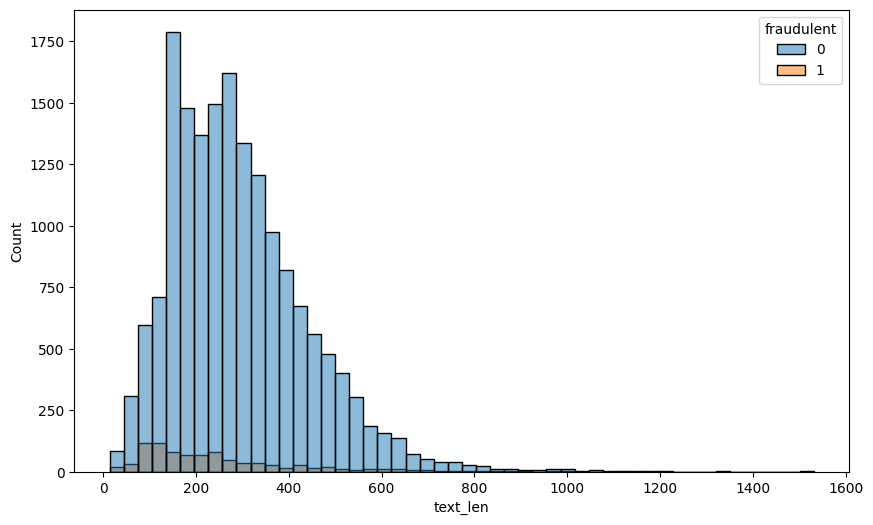

In [96]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="text_len", hue="fraudulent", kde=False, bins=50)
plt.show()

In [97]:
df['text_len'].describe()

count    17879.000000
mean       288.665977
std        147.937320
min         14.000000
25%        177.000000
50%        265.000000
75%        368.000000
max       1532.000000
Name: text_len, dtype: float64

In [98]:
df[df['fraudulent']==0]['text_len'].describe()

count    17014.000000
mean       291.202833
std        146.711947
min         18.000000
25%        181.000000
50%        268.000000
75%        371.000000
max       1532.000000
Name: text_len, dtype: float64

In [99]:
df[df['fraudulent']==1]['text_len'].describe()

count     865.000000
mean      238.767630
std       162.483383
min        14.000000
25%       120.000000
50%       196.000000
75%       308.000000
max      1000.000000
Name: text_len, dtype: float64

### 3.3 train-test-split

### 3.4 Encoding

In [ ]:
# frequency encoding

In [ ]:
# one-hot encoding

### 3.5 Get embeddings

In [ ]:
## pre trained
## tokenized, embedding layer

## 4. Modelling

- new features: location country/state/city, company_profile_isna, full_text_len
- missing values: fill with 'Unknown'
- re-bins: salary_range
- encoding: frequency encoding & one-hot
- embeddings: pre trained, tokenize then embedding layer
